IMPORT LIBRARY

In [44]:
import pandas as pd
import numpy as np
import missingno as mso
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [45]:
df= pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [47]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

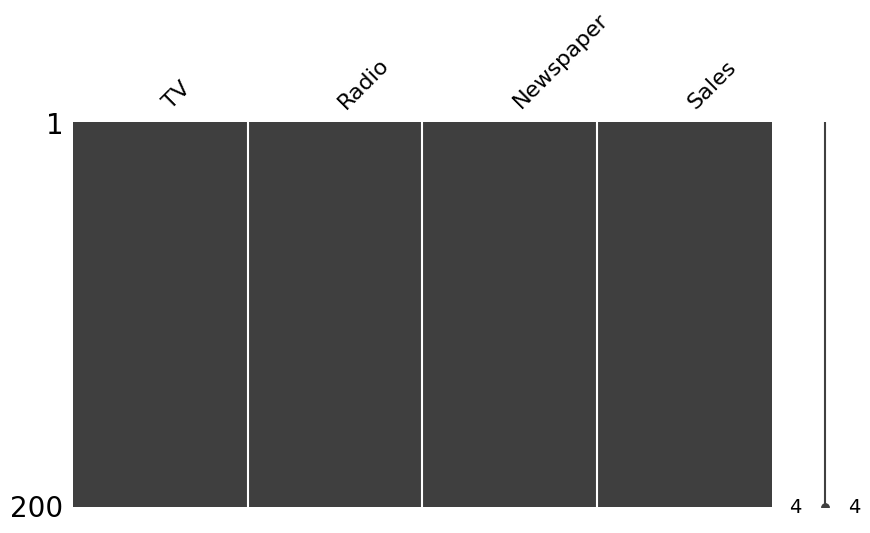

In [48]:
mso.matrix(df,figsize=(10,5))

df.isnull().sum()

In [49]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

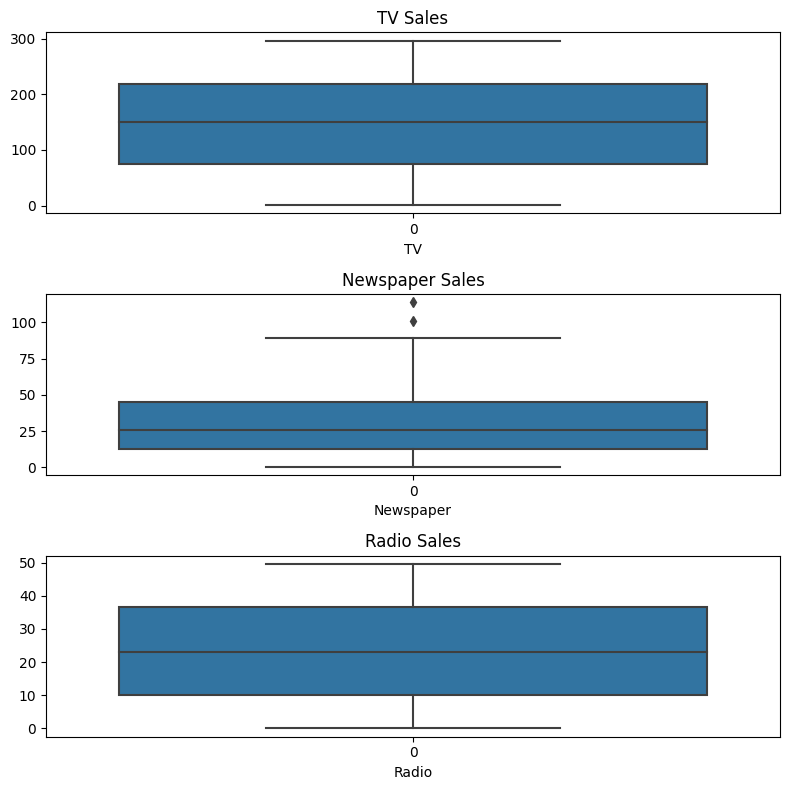

In [50]:
# Create a 3x1 grid of subplots
fig, axs = plt.subplots(3, figsize=(8, 8))

# Plot the box plots for 'TV', 'Newspaper', and 'Radio' columns
plt1 = sns.boxplot(df['TV'], ax=axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax=axs[1])
plt3 = sns.boxplot(df['Radio'], ax=axs[2])

# Add titles to each subplot
axs[0].set_title('TV Sales')
axs[1].set_title('Newspaper Sales')
axs[2].set_title('Radio Sales')

# Add x-axis labels
axs[0].set_xlabel('TV')
axs[1].set_xlabel('Newspaper')
axs[2].set_xlabel('Radio')

# Customize layout for better readability
plt.tight_layout()

# Show the plot
plt.show()


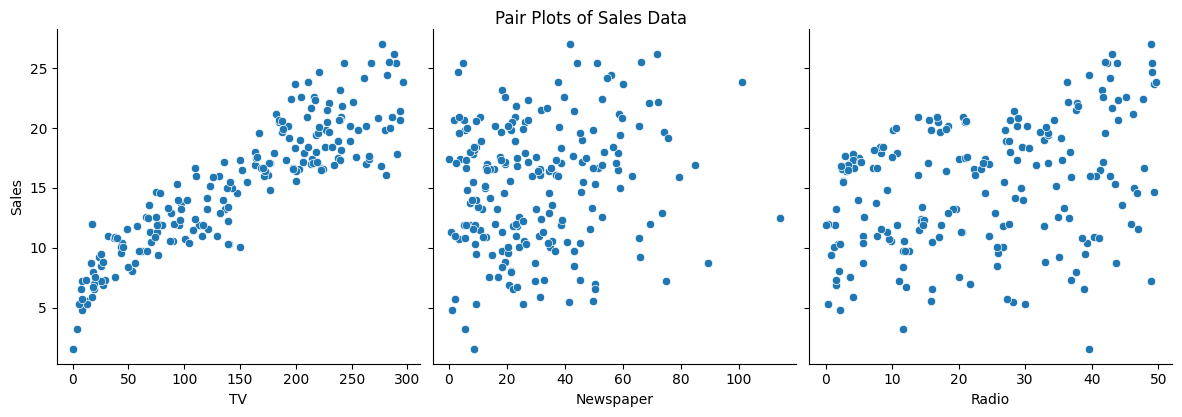

In [51]:
# Create a pair plot
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.suptitle('Pair Plots of Sales Data', y=1.02)  # Title above the plots
plt.show()

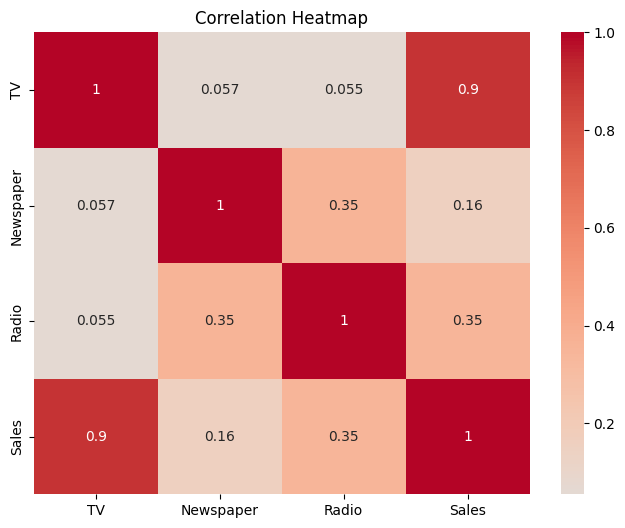

In [52]:
# Create a correlation heatmap
correlation_matrix = df[['TV', 'Newspaper', 'Radio', 'Sales']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


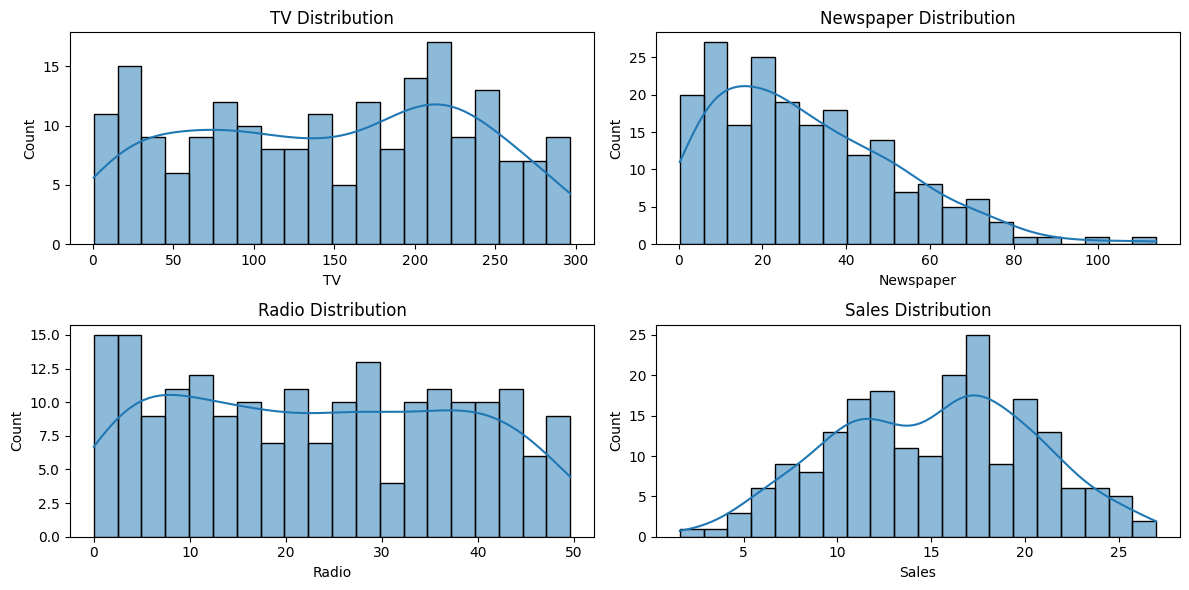

In [53]:
# Create distribution plots for each column
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['TV'], bins=20, kde=True)
plt.title('TV Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['Newspaper'], bins=20, kde=True)
plt.title('Newspaper Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['Radio'], bins=20, kde=True)
plt.title('Radio Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['Sales'], bins=20, kde=True)
plt.title('Sales Distribution')

plt.tight_layout()
plt.show()


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X  = df.drop('Sales',axis=1)
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [56]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score


In [65]:
random_state = 42
regressors = []
regressors.append(('LinearRegression', LinearRegression()))
regressors.append(('DecisionTreeRegressor', DecisionTreeRegressor(random_state=random_state)))
regressors.append(('RandomForestRegressor', RandomForestRegressor(random_state=random_state)))
regressors.append(('KNeighborsRegressor', KNeighborsRegressor()))


scoring = {'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
           'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
           'r2': make_scorer(r2_score)}

results = []
names = []

for name, regressor in regressors:
    kfold = KFold(n_splits=10, random_state=random_state, shuffle=True)
    cv_results = cross_validate(regressor, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)

for i in range(len(names)):
    print(f"{names[i]}: MAE={-results[i]['test_neg_mean_absolute_error'].mean()}, "
          f"MSE={-results[i]['test_neg_mean_squared_error'].mean()}, R2={results[i]['test_r2'].mean()}")

LinearRegression: MAE=1.2751070827703614, MSE=2.877314393569643, R2=0.866799386620225
DecisionTreeRegressor: MAE=1.2899999999999996, MSE=3.1008749999999994, R2=0.8468973060410885
RandomForestRegressor: MAE=0.9393124999999992, MSE=1.6449328125, R2=0.9237288249740951
KNeighborsRegressor: MAE=1.32925, MSE=2.73384, R2=0.874097188125248


In [66]:
LR = LinearRegression()
LR.fit(X,y)
LR.score(X_test,y_test)

0.9105453909234777

In [67]:
DTR = DecisionTreeRegressor()
DTR.fit(X,y)
DTR.score(X_test,y_test)

1.0

In [68]:
RFR = RandomForestRegressor()
RFR.fit(X,y)
RFR.score(X_test,y_test)

0.9953467425107845

In [69]:
KNR = KNeighborsRegressor()
KNR.fit(X,y)
KNR.score(X_test,y_test)

0.9508593545213601

In [74]:
ypred = DTR.predict(X_test)
res=(y_test, ypred)


C:\Users\saroj\AppData\Local\Temp\ipykernel_11256\1045377869.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


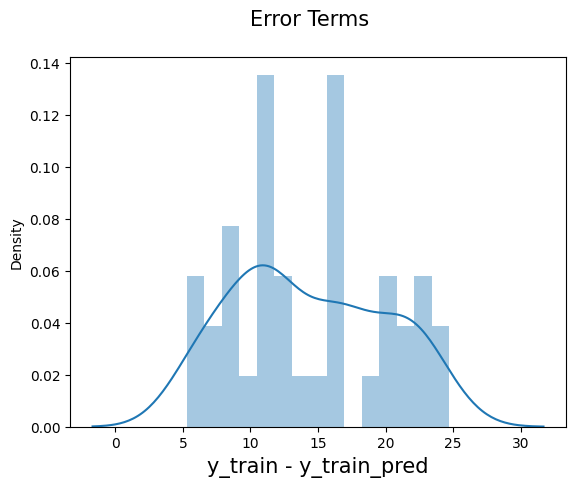

In [77]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                   
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()

In [79]:
r_squared = r2_score(y_test, y_test)
r_squared

1.0

In [81]:
import pickle

In [82]:
pickle.dump(DTR, open('Sales Prediction.pkl', 'wb'))